# BUSINESS UNDERSTANDING
## OVERVIEW
Selecting a hotel or any accommodation has become challenging to many travelers due to the many options available. This is why it is important for property owners to be able to bridge their accommodations with tomorrow’s customers in order to increase the number of bookings as well as keep their guests satisfied. This project focuses on developing a recommendation tool that would recommend places of accommodation based on the user’s preferences with respect to such features as location, price, and amenities. system uses advanced tools and methods, in particular, property details are scanned using machine learning techniques and language processing to give recommendations for the individual. It resolves limitations of the previous systems, one of which is difficulty in making recommendations for unfamiliar users or lack of sufficient information. In view of this, the system, which is aimed at providing an intuitive user interface, is targeted at, and making accurate and effective recommendations, aims at making the search for properties less time consuming which would improve the experience of travelers.

## PROBLEM STATEMENT
Nowadays people who are traveling find it difficult to select the right hotel or an Airbnb to stay due to their large number of choices available. This happens because different properties have different features such as location, budget and amenities or other personal needs. Also, the property owners in these platforms would want their properties to be matched to the right customers so that the rate they get booked increases and also to make sure that the customers are satisfied. Therefore, there is need of a solution that will use the specific features of each property to match travelers with the best accommodations for them based on their preferences while also property owners benefiting.
## GENERAL OBJECTIVES
To develop a feature-based recommendations system for hotels and Airbnb that matches a person with accommodation based on property features such as location, price and amenities thereby improving user satisfaction, increasing booking rates and improving the visibility of properties.

## SPECIFIC OBJECTIVES
* To develop a recommendation system that suggests hotels and Airbnb’s based on the features of the property that is the location, price and amenities available.
* To improve customer satisfaction by recommending them with properties that almost match with their preference in terms of features they want.
* To reduce the time people, spend when selecting a place to stay by giving them relevant recommendations based on property attributes.
* To increase hotel and Airbnb booking by matching customers with the most ones and therefore benefiting the property owners.


## BUSINESS QUESTIONS 
1. In what ways do specific suggestions help clients find what they need faster and improve their booking experience?  
2. What key features of a property sway a customer's decision when they are booking?  
3. How can we make accommodation recommendations more personalized to boost customer satisfaction?
4. How can we make sure that property owners benefit from boosting their properties' visibility and booking rate?
5. How can we accurately recommend accommodation to travelers based on their tastes and property attributes like cost, location, and facilities?
## EXPECTED BENEFITS TO THE ORGANISATION
- Increased Customer Satisfaction
- Higher Booking of accomodation.
- Improved Property Visibility
- Optimized Search Experience
## BUSINESS SUCCESS CRITERIA 
- Observing an increase in property bookings.
- Increased listing updates from property owners because of higher booking rates.
- Receiving positive feedback from travelers.

## PROJECT SUCCESS CRITERIS

## ASSESSING THE SITUATION
### Risks
Inaccurate recommendations leading to unsatisfied users.
### Limitations
- Availability and quality of property data. 
### Assumptions
Users have provided accurate information about their preferences.

## PROJECT GOALS
- Developing a hotel and airbnbs app recommendation system.
- Enhance user experience by giving customers personalized recommendations.
- Boost the rate of accomodation booking.
- Support accomodation owners by increasing visibility of their property.
## PROJECT PLAN

Business Understanding

Data Understanding

Data Preparation

Exploratory Data Analysis

Feature Engineering

Modeling

Model Evaluation

Deployment

# DATA UNDERSTANDING 
## OVERVIEW

## DATA DESCRIPTION




In [1]:
import sys
print(sys.version)

3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]


In [87]:
# Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import re
from wordcloud import WordCloud
import spacy
from langdetect import detect, DetectorFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import hamming
pd.set_option('display.max_colwidth', None)
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import multiprocessing
from scipy.spatial.distance import cdist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Loading the data
df = pd.read_csv("data_2/Airbnb_Data.csv")
# Previewing the first five rows of the dataset
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Essentials,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air conditioning"",Kitchen,Breakfast,""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_50""}",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Indoor fireplace"",""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher"",Essentials}",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9c86-41ea-a735-43d933111063.jpg?aki_policy=small,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo}",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
# Previewing the last five rows of the data set
df.tail()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6016bc16_original.jpg?aki_policy=small,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Free parking on premises"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo,Hangers,""Hair dryer"",""translation missing: en.hosting_amenity_50""}",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a94e-427c-bafd-7971a3edca9b.jpg?aki_policy=small,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,Gym,Elevator,""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Hot water"",""Bed linens"",Microwave,""Coffee maker"",Refrigerator,Dishwasher,""Dishes and silverware"",""Cooking basics"",Oven,Stove}",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5293-4a22-a83e-54c8bc1bbf0d.jpg?aki_policy=small,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kitchen,Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-06d9-4417-86ca-e6b40c22edca.jpg?aki_policy=small,10011,0.0,2.0
74110,3534845,4.852030,Boat,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free parking on premises"",Heating,""Family/kid friendly"",""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",""Laptop friendly workspace""}",4,1.0,Real Bed,moderate,False,...,33.761096,-118.192409,Cozy Boat at Shoreline Village,Long Beach,205,96.0,https://a0.muscache.com/im/pictures/22968537/da0156bc_original.jpg?aki_policy=small,90802,1.0,2.0


In [5]:
df.shape

(74111, 29)

In [6]:
# Getting the shape of the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 74111 rows and 29 columns


### Preliminary Data Inspection


In [7]:
# Getting the 'data' about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [8]:
df.city.value_counts()

city
NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: count, dtype: int64

In [9]:
# Checking the number of data types 
df.dtypes.value_counts()

object     18
float64     7
int64       3
bool        1
Name: count, dtype: int64

In [10]:
# Checking the data types of the columns
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [11]:
# Obtaining the summary descriptive statistics of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,74111.0,NaN,NaN,NaN,11266617.102468,6081734.886894,344.0,6261964.5,12254147.0,16402260.5,21230903.0
log_price,74111.0,NaN,NaN,NaN,4.782069,0.717394,0.0,4.317488,4.70953,5.220356,7.600402
property_type,74111,35,Apartment,49003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,74111,3,Entire home/apt,41310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,74111,67122,{},586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74111.0,NaN,NaN,NaN,3.155146,2.153589,1.0,2.0,2.0,4.0,16.0
bathrooms,73911.0,NaN,NaN,NaN,1.235263,0.582044,0.0,1.0,1.0,1.0,8.0
bed_type,74111,5,Real Bed,72028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancellation_policy,74111,5,strict,32374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74111,2,True,54403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### OBSERVATIONS
`host_since`,`first_review` and `last_review` columns should be of datetime data type.

`id` column should be an object.

There are 18 categorical columns, 10 numerical and 1 boolean data type in the data set.

# DATA CLEANING AND PREPARATION

#### Selecting feature for content based recommendation system


In [12]:
# Selecting the features used fo creating the recommendation system
features = ['id','name','city', 'property_type', 'room_type', 'amenities', 'accommodates',
            'bathrooms', 'bed_type', 'bedrooms', 'beds', 'description', 'log_price']
df = df[features]

In [13]:
# Checkin the datatype
df.dtypes

id                 int64
name              object
city              object
property_type     object
room_type         object
amenities         object
accommodates       int64
bathrooms        float64
bed_type          object
bedrooms         float64
beds             float64
description       object
log_price        float64
dtype: object

In [14]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 74111 rows and 13 columns


In [15]:
# Converting all object columns to lower case ,removing white spaces and extra spaces
df[df.select_dtypes("object").columns] = df.select_dtypes("object").apply(lambda x: x.str.strip().str.lower().str.replace(r'\s+', ' ', regex=True))

In [16]:
# Getting the values and their count in cleaning fee column
df.name.value_counts()

name
east village studio                          9
bunk bed in the treat street clubhouse       8
home away from home                          8
cozy private room                            8
location, location, location                 7
                                            ..
comfy apt in logan circle dc!                1
modern | 5br 2ba | 5 min to bos              1
cozy gold coast studio, 2 mins to subway!    1
a convenient, cozy, and comfortable stay     1
cozy boat at shoreline village               1
Name: count, Length: 72912, dtype: int64

In [17]:
# Getting the values and their count in city column
df.city.value_counts()

city
nyc        32349
la         22453
sf          6434
dc          5688
chicago     3719
boston      3468
Name: count, dtype: int64

In [18]:
# converting acronyms in the city column to full word
city_mapping = {"nyc": "new york city", "la": "los angeles", "sf": "san francisco",
                "dc": "washington, d.c.", "chicago": "chicago", "boston": "boston"}

df["city"] = df["city"].map(city_mapping)

In [19]:
# Getting the values and their count in property type column
df.property_type.value_counts()

property_type
apartment             49003
house                 16511
condominium            2658
townhouse              1692
loft                   1244
other                   607
guesthouse              498
bed & breakfast         462
bungalow                366
villa                   179
dorm                    142
guest suite             123
camper/rv                94
timeshare                77
cabin                    72
in-law                   71
hostel                   70
boutique hotel           69
boat                     65
serviced apartment       21
tent                     18
castle                   13
vacation home            11
yurt                      9
hut                       8
treehouse                 7
chalet                    6
earth house               4
tipi                      3
train                     2
cave                      2
casa particular           1
parking space             1
lighthouse                1
island                    1
Name: 

In [20]:
# Getting the values and their count in room type column
df.room_type.value_counts()

room_type
entire home/apt    41310
private room       30638
shared room         2163
Name: count, dtype: int64

In [21]:
# Getting the values and their count in accommodates column
df.accommodates.value_counts()

accommodates
2     31854
4     12066
1      9434
3      7794
6      4969
5      3444
8      1795
7       946
10      701
16      301
9       270
12      264
14      104
11       79
15       54
13       36
Name: count, dtype: int64

In [22]:
# Getting the values and their count in bed type column
df.bed_type.value_counts()

bed_type
real bed         72028
futon              753
pull-out sofa      585
airbed             477
couch              268
Name: count, dtype: int64

In [23]:
# Getting the values and their count in bed column
df.beds.value_counts()

beds
1.0     45144
2.0     16704
3.0      6442
4.0      3065
5.0      1287
6.0       661
7.0       216
8.0       186
10.0       88
9.0        72
16.0       38
12.0       29
11.0       23
13.0       10
15.0        6
14.0        4
0.0         4
18.0        1
Name: count, dtype: int64

In [24]:
df.columns

Index(['id', 'name', 'city', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'bedrooms', 'beds',
       'description', 'log_price'],
      dtype='object')

#### Checking for and handling Missing values

In [25]:
# Identifying columns with missing values
missing_values = df.isna().sum()

# Getting the columns with missing values
missing_values = missing_values[missing_values>0]
missing_values.sort_values(ascending=False)

bathrooms    200
beds         131
bedrooms      91
dtype: int64

In [26]:
# Checking the percentage of missing values
missing_value_percentage = (missing_values/len(df)) * 100
print(missing_value_percentage.sort_values(ascending=False).apply(lambda x: f'{x:.2f}%'))

bathrooms    0.27%
beds         0.18%
bedrooms     0.12%
dtype: object


In [27]:
pd.set_option('display.max_colwidth', None)
# Null rows dataframe
null_rows = df[df.isna().any(axis=1)]
null_rows.sample(10,random_state=42)

,id,name,city,property_type,room_type,amenities,accommodates,bathrooms,bed_type,bedrooms,beds,description,log_price
40192,17131099,private room wifi kitchen close to everything,los angeles,apartment,private room,"{tv,""wireless internet"",""air conditioning"",kitchen,""free parking on premises"",""smoking allowed"",heating,""family/kid friendly"",""suitable for events"",washer,dryer,""smoke detector"",""carbon monoxide detector"",""first aid kit"",essentials,shampoo,hangers,""hair dryer"",iron,""laptop friendly workspace""}",1,1.5,real bed,NaN,NaN,close to everything.,5.176150
34189,17211583,"private room in brand new apt in brooklyn, nyc",new york city,apartment,private room,"{tv,""cable tv"",""wireless internet"",""air conditioning"",kitchen,""free parking on premises"",""buzzer/wireless intercom"",heating,""smoke detector"",""carbon monoxide detector"",""first aid kit"",""safety card"",essentials,iron,""laptop friendly workspace""}",2,1.0,pull-out sofa,1.0,NaN,"the home is located in the heart of brooklyn, with beautiful prospect park in walking distance and manhattan only 20 minutes away by train or car. our home has just been fully remodeled, and super cozy and a great place to sleep, away from the noise. enjoy fresh linens and a brand new sleeper couch with tv.",4.094345
47607,3877009,bay ridge brooklyn safe haven 2,new york city,apartment,entire home/apt,"{tv,internet,""wireless internet"",""air conditioning"",kitchen,""free parking on premises"",heating,dryer,essentials,shampoo,hangers,""hair dryer"",iron,""laptop friendly workspace"",""private entrance""}",4,NaN,real bed,1.0,1.0,"upscale resedential neighborhood very , very , very safe close to everything free pick up from airport upon arrival ($75 value ) upscale resedential neighborhood very , very , very safe close to everything free pick up from airport upon arrival ($75 value ) there are 3 seperate 1 bedroom units .... look at just a nice place to stay for more info i am in bay ridge brooklyn, with private 1 bedroom apartment, the unit has a main bedroom with a queen-size bed. the living room has a sleep sofa and a normal bed. each unit sleep 4 persons. an eat in kitchen and bath, cable tv and high speed internet, very comfortable and clean. you wont be disapointed. thank you for your interest in our rental property. your hosts, the karelas family, are a blend of greek and spanish cultures, as well as seasoned travelers of the world. we invite you to taste our hospitality and promise you to do our best to make your stay in nyc a memorable one. we are located in bay ridge, a very safe, wonderful, upscale r",4.595120
44911,14139187,central la cozy private room,los angeles,house,private room,"{tv,internet,""wireless internet"",kitchen,washer,dryer}",2,NaN,real bed,1.0,1.0,"private room in central los angeles. the room has a bed, desk and chair. free wi-fi. guests have access to the kitchen and coin-laundry. the bathrooms are shared and get cleaned daily. great central location in los angeles. close to usc, downtown l.a., and hollywood. close to public transportation and easy freeway access. free street parking the rooms can be rented short-term or long-term. the room you get may not be the same as the one in the picture of this listing, but it will be very similar.",4.025352
69495,1540236,sunny room w/ private sink,san francisco,apartment,private room,"{internet,""wireless internet"",kitchen,""pets live on this property"",cat(s),heating,washer,dryer,""smoke detector"",essentials,""laptop friendly workspace""}",1,NaN,real bed,1.0,1.0,"light - light - & more light! 1 large furnished bedroom in 1885 san francisco victorian with extra-high ceilings - and a small private sink room - just like your great grandmother used to have. best food & coffee in the city 2 blocks away... 1 furnished bedroom available in a historic san francisco victorian. large, sunny, and has high ceilings. available up to 4 months. one closet, and pocket doors that can open onto the shared living 

##### Handling missing values in `bathrooms` column

In [28]:
# Getting the value counts of bathrooms    
df.bathrooms.value_counts()

bathrooms
1.0    58099
2.0     7936
1.5     3801
2.5     1567
3.0     1066
3.5      429
4.0      286
0.5      209
0.0      198
4.5      116
5.0       72
8.0       41
5.5       39
6.0       24
6.5       12
7.0       10
7.5        6
Name: count, dtype: int64

In [29]:
df.groupby('room_type')['bathrooms'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

room_type
private room       127
entire home/apt     62
shared room         11
Name: bathrooms, dtype: int64

In [30]:
df.groupby('accommodates')['bathrooms'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

accommodates
2     93
1     65
4     20
3     13
6      3
8      3
5      2
16     1
7      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
Name: bathrooms, dtype: int64

In [31]:
df.groupby('bed_type')['bathrooms'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

bed_type
real bed         191
futon              5
airbed             3
couch              1
pull-out sofa      0
Name: bathrooms, dtype: int64

In [32]:
df.groupby('bedrooms')['bathrooms'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

bedrooms
1.0     178
2.0      11
3.0       4
4.0       2
0.0       0
5.0       0
6.0       0
7.0       0
8.0       0
9.0       0
10.0      0
Name: bathrooms, dtype: int64

In [33]:
df.groupby('beds')['bathrooms'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

beds
1.0     133
2.0      18
3.0       1
4.0       1
5.0       1
0.0       0
12.0      0
16.0      0
15.0      0
14.0      0
13.0      0
9.0       0
11.0      0
10.0      0
8.0       0
7.0       0
6.0       0
18.0      0
Name: bathrooms, dtype: int64

In [34]:
df.groupby('property_type')['bathrooms'].apply(lambda x: x.isnull().sum()).sort_values(ascending=False)

property_type
apartment             120
house                  57
dorm                    8
other                   5
bed & breakfast         4
loft                    2
townhouse               1
parking space           1
condominium             1
camper/rv               1
train                   0
tipi                    0
lighthouse              0
treehouse               0
timeshare               0
tent                    0
serviced apartment      0
vacation home           0
villa                   0
boat                    0
hut                     0
island                  0
in-law                  0
boutique hotel          0
hostel                  0
guesthouse              0
guest suite             0
earth house             0
chalet                  0
cave                    0
castle                  0
casa particular         0
cabin                   0
bungalow                0
yurt                    0
Name: bathrooms, dtype: int64

In [35]:
# from statsmodels.imputation.mice import test_mcar

# mcar_test = test_mcar(df)
# print("MCAR Test p-value:", mcar_test.pvalue)

In [36]:
import re

# Bathroom keyword mapping
bathroom_keywords = {'one bathroom': 1, 'two bathrooms': 2, 'three bathrooms': 3,
                     'four bathrooms': 4, 'private bathroom': 1, 'half bathroom': 0.5,
                     'ensuite bathroom': 1, 'full bathroom': 1, 'master bathroom': 1,
                     '1.5 bathrooms': 1.5, '2.5 bathrooms': 2.5, '3.5 bathrooms': 3.5, 
                     '4.5 bathrooms': 4.5}

# Function to update bathrooms column due to inconsistency
def update_bathroom_count(row):
    if row['bathrooms'] == 0: 
        description = row['description'].lower()

        # Checking for  numbers before "bathroom(s)" word
        match = re.search(r'(\d+(\.\d+)?)\s+bathrooms?', description)
        if match:
            return float(match.group(1))  

        # Checking for words in the mapping
        for key, value in bathroom_keywords.items():
            if key in description:
                return value

        # # Handling shared bathroom 
        # if 'shared bathroom' in description or 'bathrooms are shared' in description:
        #     return 1 

        # setting value to 1 if "bathroom" is mentioned but no specific count
        if 'bathroom' in description or 'bathrooms' in description:
            return 1

    return row['bathrooms']  

# Apply function
df['bathrooms'] = df.apply(update_bathroom_count, axis=1)

In [37]:
# Getting the value counts of bathrooms    
df.bathrooms.value_counts()

bathrooms
1.0    58182
2.0     7943
1.5     3801
2.5     1569
3.0     1067
3.5      429
4.0      286
0.5      209
4.5      116
0.0      104
5.0       72
8.0       41
5.5       39
6.0       24
6.5       12
7.0       11
7.5        6
Name: count, dtype: int64

In [38]:
# Dataframe of columns with no batherooms
no_bathrooms = df[df["bathrooms"]==0.0]
no_bathrooms.head(3)

,id,name,city,property_type,room_type,amenities,accommodates,bathrooms,bed_type,bedrooms,beds,description,log_price
1356,455864,cozy bed with a view,los angeles,bed & breakfast,shared room,"{""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",1,0.0,real bed,1.0,1.0,"the warm neutral spacious bedroom, 1 bedroom and bath in the main floor ,immediately following newly replaced gorgeous contemporary floor, upgrades include new paint .",3.912023
1441,18703078,room in east village with backyard,new york city,apartment,private room,"{tv,""cable tv"",internet,""wireless internet"",""air conditioning"",kitchen,""smoking allowed"",""buzzer/wireless intercom"",heating,""smoke detector"",""carbon monoxide detector"",essentials,""lock on bedroom door"",""24-hour check-in"",hangers,iron,""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",2,0.0,real bed,1.0,1.0,"nice bedroom right in the center of east village ! be where the action is ! only 2 blocks away from l train, the unit has his own private backyard. you'll share the unit with my 2 roommates (mike - 28yo - uk & james - 27yo - uk).",4.248495
1704,15007995,elin's room,los angeles,house,private room,"{tv,""cable tv"",internet,""wireless internet"",""air conditioning"",pool,kitchen,""free parking on premises"",doorman,gym,breakfast,""hot tub"",heating,washer,dryer,essentials,shampoo}",1,0.0,real bed,1.0,1.0,"hi, welcome students! 1 bedroom, wifi, fridge, fully furnished, 800 month including utilities, laundry, kitchen access, cable",3.688879


<Figure size 1200x600 with 0 Axes>

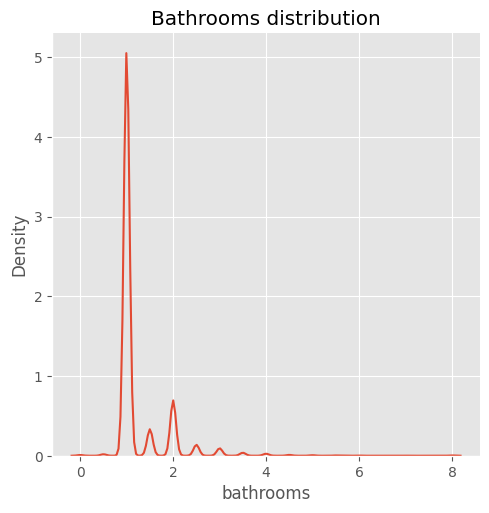

In [39]:
# Setting the size of the plot 
plt.figure(figsize=(12,6))
# Checking the distribution on bathrooms
sns.displot(data=df,x="bathrooms", kind="kde")

# Adding title
plt.title("Bathrooms distribution")

plt.show()

In [40]:
# Filling bathroom missing values using median
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

##### Handling missing values in `beds` column

In [41]:
# Getting the value counts of beds
df.beds.value_counts()

beds
1.0     45144
2.0     16704
3.0      6442
4.0      3065
5.0      1287
6.0       661
7.0       216
8.0       186
10.0       88
9.0        72
16.0       38
12.0       29
11.0       23
13.0       10
15.0        6
14.0        4
0.0         4
18.0        1
Name: count, dtype: int64

In [42]:
# Bed keywords mapping
bed_keywords = {'double bed': 1,'single bed': 1,'two single beds': 2,'queen bed': 1,'king bed': 1}

# Function to update bed column due to inconsistency 
def update_bed_count(row):
    if row['beds'] == 0:  
        description = row['description'].lower()
        for key, value in bed_keywords.items():
            if key in description:
                return value  
        if 'bed' in description or 'beds' in description: 
            return 1  
    return row['beds']

# Apply function
df['beds'] = df.apply(update_bed_count, axis=1)

In [43]:
# Getting the value counts of beds
df.beds.value_counts()

beds
1.0     45147
2.0     16704
3.0      6442
4.0      3065
5.0      1287
6.0       661
7.0       216
8.0       186
10.0       88
9.0        72
16.0       38
12.0       29
11.0       23
13.0       10
15.0        6
14.0        4
0.0         1
18.0        1
Name: count, dtype: int64

In [44]:
# Dataframe of columns with no beds
no_beds = df[df["beds"]==0.0]
no_beds.head()

,id,name,city,property_type,room_type,amenities,accommodates,bathrooms,bed_type,bedrooms,beds,description,log_price
39057,8684344,posh studio in back bay,boston,apartment,entire home/apt,"{tv,""cable tv"",internet,""wireless internet"",""air conditioning"",kitchen,""buzzer/wireless intercom"",heating,""family/kid friendly"",washer,dryer,""smoke detector"",""fire extinguisher"",essentials,shampoo,""24-hour check-in"",hangers,""hair dryer"",iron,""laptop friendly workspace"",""self check-in"",lockbox,""hot water"",""bed linens"",microwave,""coffee maker"",refrigerator,""dishes and silverware"",""cooking basics"",stove,""long term stays allowed""}",2,1.0,real bed,0.0,0.0,"this posh studio has sleek hardwood floors, a large open-concept kitchen, and incredible architectural details. located in back bay, a short walk to fashionable shops, river-side walkways, and excellent restaurants. every booking is instantly confirmed. every call or message is answered within minutes. every home is equipped with crisp linens, high-speed wi-fi, and kitchen and bath essentials—everything you need for an exceptional stay. our concierge is available by phone, email, or messenger 24/7. don’t hesitate to contact us if you need anything, from extra towels to restaurant recommendations. otherwise, we’ll leave you to enjoy your stay. right downstairs you’ll find newbury street bustling with high end boutiques and restaurants. just a block away, take a stroll on the commonwealth ave mall straight to the public gardens and boston common. boston’s back bay is known for its lovely rows of victorian houses, river-side walkways, fashionable shops, and excellent restaurants. parking",4.691348


<Figure size 1200x600 with 0 Axes>

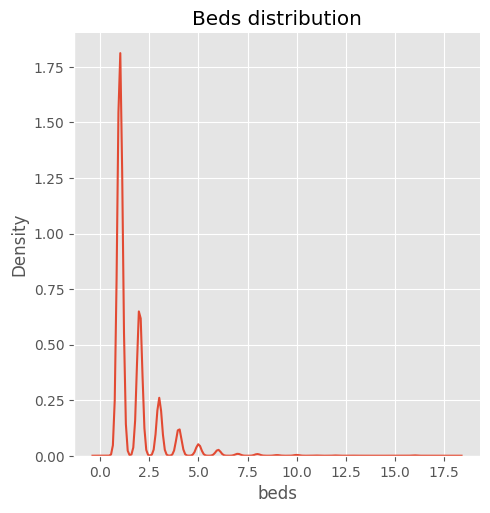

In [45]:
# Setting the size of the plot 
plt.figure(figsize=(12,6))

# Checking the distribution on bathrooms
sns.displot(data=df,x="beds", kind="kde")

# Adding title
plt.title("Beds distribution")

plt.show()

In [46]:
# Filling beds missing values using median
df['beds'] = df['beds'].fillna(df["beds"].median())

In [47]:
# Rounding the beds column to the nearest whole number and converting it to int
df['beds'] = df['beds'].round().astype('int64')

##### Handling missing values in `bedrooms` column

In [48]:
# Getting the value counts of bedrooms    
df.bedrooms.value_counts()

bedrooms
1.0     49784
2.0     11351
0.0      6715
3.0      4309
4.0      1330
5.0       355
6.0       106
7.0        38
8.0        14
10.0       10
9.0         8
Name: count, dtype: int64

In [49]:
# Bedroom keyword mapping
bedroom_keywords = {'one bedroom': 1, 'two bedrooms': 2, 'three bedrooms': 3,
                    'four bedrooms': 4, 'five bedrooms': 5, 'six bedrooms': 6,
                    'single bedroom': 1, 'double bedroom': 1, 'master bedroom': 1,
                    'studio': 1, 'loft': 1, 'private room': 1, 'shared room': 1,
                    '1.5 bedrooms': 1.5, '2.5 bedrooms': 2.5, '3.5 bedrooms': 3.5,
                    '4.5 bedrooms': 4.5, '5.5 bedrooms': 5.5}

# Function to update bedroom column due to inconsistency 
def update_bedroom_count(row):
    if row['bedrooms'] == 0:  
        description = row['description'].lower()
        for key, value in bedroom_keywords.items():
            if key in description:
                return value  
        if 'bedroom' in description or 'bedrooms' in description: 
            return 1  
    return row['bedrooms']

# Apply function
df['bedrooms'] = df.apply(update_bedroom_count, axis=1)

In [50]:
# Getting the value counts of bedrooms    
df.bedrooms.value_counts()

bedrooms
1.0     54620
2.0     11353
3.0      4309
0.0      1877
4.0      1330
5.0       355
6.0       106
7.0        38
8.0        14
10.0       10
9.0         8
Name: count, dtype: int64

In [51]:
# Dataframe of columns with no bedrooms
no_bedrooms = df[df["bedrooms"] ==0.0]
no_bedrooms.head(3)

,id,name,city,property_type,room_type,amenities,accommodates,bathrooms,bed_type,bedrooms,beds,description,log_price
55,6443678,sunny studio in doorman building,new york city,apartment,entire home/apt,"{tv,""cable tv"",internet,""wireless internet"",""air conditioning"",kitchen,doorman,elevator,""buzzer/wireless intercom"",heating,""family/kid friendly"",washer,dryer,""smoke detector"",""carbon monoxide detector"",essentials,""translation missing: en.hosting_amenity_50""}",5,1.0,real bed,0.0,2,"beautiful, spacious apartment in the heart of harlem. close to restaurants, nightlife and transportation. there's culture, food and nightlife! number 2 and 3 trains to 135th street",4.744932
98,7226513,cozy and sunny studio in uws manhattan,new york city,apartment,entire home/apt,"{""wireless internet"",kitchen,breakfast,elevator,heating,washer,dryer,""smoke detector"",""carbon monoxide detector"",essentials,hangers,""hair dryer"",""laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50"",""private entrance"",bathtub}",2,1.0,real bed,0.0,1,"visiting the city? come stay in my cozy apt in manhattan!!! it's an amazing place to live right in upper west side. quiet and with tons of sunlight. i love the neighborhood, so convenient, close to everything and charming: 1min walk to cool bars and restaurants, 3min to columbia university, 1min to subway, 7min to central park and st.john the divine cathedral is right in my street. also, you can take the subway and get to times sq in 15 min, chelsea in 20, soho in 30, green point in 35... no matter how cold it's outside, the building remains always warm and cozy. super quiet: my neighbors are the best. and sooo sunny the whole year. you'll love waking up here in a sunny morning. only super super tidy and clean guests, professionals, responsible and able to give back the apartment exactly as i'll trust it to them: pristine :) i'll be out of town but you can contact me 24/7 if you need me. i love the neighborhood, so convenient, close to everything and charming: 1min walk to cool bars a",4.804021
100,14873270,light filled studio apartment,new york city,apartment,entire home/apt,"{internet,""wireless internet"",""air conditioning"",kitchen,elevator,""buzzer/wireless intercom"",washer,dryer,essentials,shampoo}",2,1.0,real bed,0.0,1,"perfect for a single or a couple. clean and spacious, lots of plants and natural light. fully loaded kitchen. down the block from the cloisters and fort tryon park. block away from a and 1 trains, restaurants, bars and pubs. 1-2 week rental beg. 8/20 lots of light and plants. very colorfully and simply decorated. very comfortable. access to one closet and the entire apartments as well laundry room. if you are taking the apartment for the whole month or summer i will make 2 closets available. all the kitchenware is also at your disposal and spices or condiments in the pantry and fridge. if guests arrive prior to 2 pm i will be here to greet guests and answer any questions. i can come (as requested) on a weekly basis to water plants and manage any household issues if they come up. i am available by phone and can come to the apt. or contact the super if anything is needed. great neighborhood. everything it at arms reach. great nightlife, food, parks, culture, markets, pharmacies. (ur",4.174387


<Figure size 1200x600 with 0 Axes>

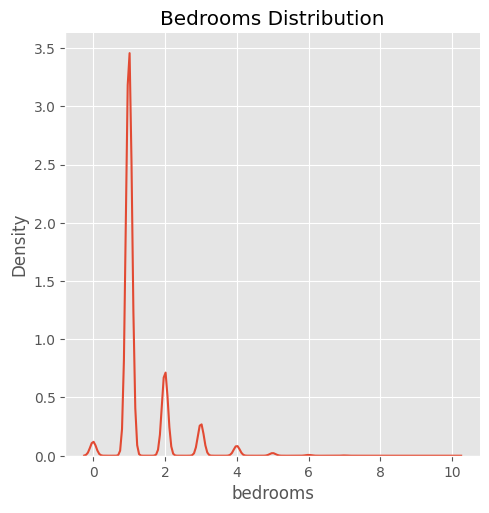

In [52]:
# Setting the size of the plot 
plt.figure(figsize=(12,6))

# Checking the distribution on bedrooms
sns.displot(data=df,x="bedrooms", kind="kde")

# Adding title
plt.title("Bedrooms Distribution")

plt.show()

In [53]:
# Filling bedrooms missing values using median
df['bedrooms'] = df['bedrooms'].fillna(df["bedrooms"].median())

In [54]:
# Confirming if all the missing values have successfully been imputed
df.isna().any().any()

False

In [55]:
# Converting log_price to actual price
df['price'] = np.exp(df['log_price'])
df = df.drop("log_price",axis=1)

#### Checking for and handling Missing valuessuplicate values

In [56]:
# Checking for duplicate values
df.duplicated().sum()

0

##### Type casting invalid data formats to correct formats


In [57]:
# Converting id column to an object data type
df["id"] = df["id"].astype("object")

In [58]:
df["id"].dtype

dtype('O')

In [59]:
df = df.reset_index(drop=True)  

In [60]:
df = df[['name', 'price', 'description', 'amenities','city','accommodates']]
df["name_original"] = df['name']
df["amenities_original"] = df['amenities']

# FEATURE ENGINEERING

In [61]:
# Setting seed for consistent language detection
DetectorFactory.seed = 42

# loading the English language model in spaCy
nlp = spacy.load('en_core_web_sm', disable=["parser", "ner"])

# Function for detecting if language used is english
def detect_language(text):
    try:
        return "en" if detect(text) == "en" else None
    except:
        return None 

# Function for preprocessing text
def preprocess_text(text):
    
    # Skipping non-English words and missing text
    if pd.isna(text) or detect_language(text) is None:
        return ""
    
    # Parsing the text with spaCy
    doc = nlp(text)
    
    # Lemmatizing the tokens and removing non alphabetic tokens 
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha]
    
    # Joining the lemmas back into a string and returning it
    return " ".join(lemmas)

In [62]:
# applying the preprocess_text function to the text column
df["amenities"] = [preprocess_text(text) for text in df["amenities"]]
df["description"] = [preprocess_text(text) for text in df["description"]]
df["name"] = [preprocess_text(text) for text in df["name"]]

In [63]:
# Saving the preprocessed data to a file
df.to_csv("data_2/Airbnb_Data_Preprocessed.csv", index=False)

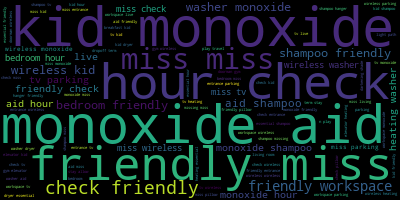

In [64]:
# Joining the different processed titles together.
long_string = ' '.join(df['amenities'])

# Creating a WordCloud object
wordcloud = WordCloud()

# Generating a word cloud
wordcloud.generate(long_string)

# Visualizing the word cloud
wordcloud.to_image()

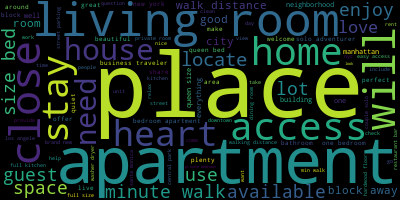

In [65]:
# Joining the different processed titles together.
long_string = ' '.join(df['description'])

# Creating a WordCloud object
wordcloud = WordCloud()

# Generating a word cloud
wordcloud.generate(long_string)

# Visualizing the word cloud
wordcloud.to_image()

In [66]:
# Combining the text features into one feature
df["description_amenities"] = df["description"] + " " + df["amenities"] + " " + df["name"]

In [67]:
df["description_amenities"][0]

'beautiful sunlit brownstone bedroom in the lovely neighborhood in brooklyn block from the promenade and brooklyn bridge park with their stunning view of manhattan and from the great shopping and food wireless kid miss beautiful brownstone bedroom'

## SIMILARITY CHECK WITHOUT STOPWORDS

In [68]:
# TF-IDF vectorization
# Creating an instance of the vectorizer
tfidf_without_stopwords = TfidfVectorizer(stop_words='english')

# Fit transforming the combined text features
tfidf_matrix_without_stopwords = tfidf_without_stopwords.fit_transform(df["description_amenities"])

In [69]:
# Function to get recommendations based on user input
def get_recommendations_from_input(user_input, price_range=None, top_n=5):
    # Transforming the user input into TF-IDF vector
    user_input_vector = tfidf_without_stopwords.transform([user_input])
    
    # Computing cosine similarity between user input and all listings
    cosine_sim = cosine_similarity(user_input_vector, tfidf_matrix_without_stopwords)
    
    # Getting the indices of the top N most similar listings
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    listing_indices = [i[0] for i in sim_scores[:top_n]]
    
    # Filtering by price range if required
    if price_range:
        min_price, max_price = price_range
        recommendations = df.iloc[listing_indices][(df['price'] >= min_price) & (df['price'] <= max_price)]
    else:
        recommendations = df.iloc[listing_indices]
    
    return  recommendations[['name', 'price','description','amenities']]

In [70]:
# Getting recommendations
user_input = "cozy apartment near the beach"
price_range = (50, 200)
recommendations = get_recommendations_from_input(user_input)
recommendations

,name,price,description,amenities
66079,cozy place for one near beach,30.0,twin beach near beach grocery restaurant bar and local shop and local transit,
17835,charming beach home close to everything,425.0,bedroom bath cozy home near the beach quiet residential area walk distance to the beach shop restaurant backyard be a quiet retreat in itself the house come with beach cruiser bike beach chair and plenty of beach chair,parking on live on this kid monoxide shampoo missing
2459,cozy beach city apartment,150.0,cozy beach city apartment with access to a several local business and restaurant as well as a night scene many bar in walking distance the house be a modern beach city and be very quiet and friendly,kid on bedroom friendly miss
48177,small cozy place in long beach,150.0,small cozy quiet apartment in long beach next to amenity mile from beach,kid detector
10636,a private and cozy room near columbia university,60.0,a clean and cozy room near public to bus stop and to subway near a open food near to columbia university near riverside park and hudson near central near time,wireless elevator kid on bedroom friendly workspace


## SIMILARITY CHECK WITH STOPWORDS

In [71]:
# TF-IDF vectorization
# Creating an instance of the vectorizer
tfidf_with_stopwords = TfidfVectorizer(stop_words=None)

# Fit transforming the combined text features
tfidf_matrix_with_stopwords = tfidf_with_stopwords.fit_transform(df["description_amenities"])

In [72]:
# Function to get recommendations based on user input
def get_recommendations_from_input(user_input, price_range=None, top_n=5):
    # Transforming the user input into TF-IDF vector
    user_input_vector = tfidf_with_stopwords.transform([user_input])
    
    # Computing cosine similarity between user input and all listings
    cosine_sim = cosine_similarity(user_input_vector, tfidf_matrix_with_stopwords)
    
    # Getting the indices of the top N most similar listings
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    listing_indices = [i[0] for i in sim_scores[:top_n]]
    
    # Filtering by price range if required
    if price_range:
        min_price, max_price = price_range
        recommendations = df.iloc[listing_indices][(df['price'] >= min_price) & (df['price'] <= max_price)]
    else:
        recommendations = df.iloc[listing_indices]
    
    return recommendations[['name', 'price','description','amenities']]

In [73]:
# Getting recommendations
user_input = "cozy apartment near the beach"
price_range = (50, 200)
recommendations = get_recommendations_from_input(user_input)
recommendations

,name,price,description,amenities
66079,cozy place for one near beach,30.0,twin beach near beach grocery restaurant bar and local shop and local transit,
17835,charming beach home close to everything,425.0,bedroom bath cozy home near the beach quiet residential area walk distance to the beach shop restaurant backyard be a quiet retreat in itself the house come with beach cruiser bike beach chair and plenty of beach chair,parking on live on this kid monoxide shampoo missing
48177,small cozy place in long beach,150.0,small cozy quiet apartment in long beach next to amenity mile from beach,kid detector
10636,a private and cozy room near columbia university,60.0,a clean and cozy room near public to bus stop and to subway near a open food near to columbia university near riverside park and hudson near central near time,wireless elevator kid on bedroom friendly workspace
2459,cozy beach city apartment,150.0,cozy beach city apartment with access to a several local business and restaurant as well as a night scene many bar in walking distance the house be a modern beach city and be very quiet and friendly,kid on bedroom friendly miss


## Modeling
### Word2Vec 

In [74]:
# Imprting the pretrained modlel
from gensim.models import Word2Vec

In [75]:
# Tokenizing the text column
df['tokens'] = df['description_amenities'].apply(lambda x: x.split())

In [76]:
# Training word2vec model
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=4, min_count=1, workers=10)

In [77]:
# Generating document embeddings by averaging word embeddings
def get_document_embedding(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [78]:
# Generating document embeddings for all listings
df['embedding'] = df['tokens'].apply(lambda x: get_document_embedding(x, word2vec_model))

In [90]:
# Getting recommendations based on user input
def get_recommendations_from_input(user_input, price_range=None, city=None, accommodates=None, top_n=5):
    
    # Tokenizing user input
    user_tokens = user_input.split()
    
    # Generating embedding for user input
    user_embedding = get_document_embedding(user_tokens, word2vec_model)
    
    # Stacking all document embeddings into a matrix
    document_embeddings = np.stack(df['embedding'].values)
    
    # Computing cosine similarity between user input and all listings
    similarities = 1 - cdist([user_embedding], document_embeddings, metric='cosine')[0]
    
    # Adding similarities to the DataFrame
    df['similarity'] = similarities
    
    # Sorting by similarity
    df_sorted = df.sort_values(by='similarity', ascending=False)
    
    # Filtering by price range, city, and accommodates
    filtered_df = df_sorted.copy()
    
    if price_range:
        min_price, max_price = price_range
        filtered_df = filtered_df[(filtered_df['price'] >= min_price) & (filtered_df['price'] <= max_price)]
    
    if city:
        filtered_df = filtered_df[filtered_df['city'].str.lower() == city.lower()]
    
    if accommodates:
        filtered_df = filtered_df[filtered_df['accommodates'] >= accommodates]
    
    # Returning top N recommendations
    return filtered_df.head(top_n)[['name_original', 'price', 'amenities_original', 'city', 'accommodates']]

In [91]:
user_input = "kid friendly"
price_range = (50,200)
city = 'los angeles'
top_n = 5
# Getting recommendations
recommendations = get_recommendations_from_input(user_input, price_range=price_range, city=city, accommodates=2, top_n=top_n)

recommendations

,name_original,price,amenities_original,city,accommodates
15070,温馨舒适,60.0,"{""family/kid friendly""}",los angeles,3
27150,罗兰岗香港超市附近大套房优惠出租,50.0,"{""family/kid friendly""}",los angeles,2
26939,alhambra 独立屋出租！,148.0,"{""family/kid friendly""}",los angeles,8
1663,monrovia 蒙罗维亚2房公寓整套出租，适合家庭结伴游旅客入住。,120.0,"{""family/kid friendly""}",los angeles,4
42525,罗兰岗孔雀园高性价比两室两卫优惠出租,120.0,"{""family/kid friendly""}",los angeles,4


In [ ]:
# Saving the model using gensim's native method
#word2vec_model.save("word2vec.model")

#print("Model saved!")